In [5]:
import os
import socket
import subprocess
import pandas as pd
import io
from contextlib import redirect_stdout
import itertools
import warnings
from datetime import datetime
import time
import timeout_decorator
import numpy as np
import matplotlib.pyplot as plt
import math
import sys


In [6]:
def islocal(): return socket.gethostname()=="rc-idsia-macBook.local"
def isserver(): return socket.gethostname()=="ec6120930b2d"
def strdate(): return datetime.today().strftime('%Y-%m-%d-%H-%M-%S')


if islocal():
    prj_path = "/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA"
    os.environ['JAVA_HOME'] = "/Library/Java/JavaVirtualMachines/openjdk-12.0.1.jdk/Contents/Home"
elif isserver():
    prj_path="/home/rcabanas/work_java_crema/crema/CreMA"
else:
    warnings.warn("Unknown server, set prj_path variable manually.")
os.chdir(prj_path)
!pwd

/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA


In [7]:
exp_folder = f"{prj_path}/papers/pgm20/experiments/"
log_folder = f"{exp_folder}/logs/"
res_folder = f"{exp_folder}/results/"

In [8]:
sys.path.append(exp_folder)
from utilplots import *

In [66]:
preliminaryBinary = {
    "markovian_ev" : f"{res_folder}/2020-04-23-08-24-04_chain_markovian_ev.csv",
    "markovian_nonev" : f"{res_folder}/2020-04-23-12-56-12_chain_markovian_nonev.csv",
    "nonmarkovian_ev" :f"{res_folder}/2020-04-23-11-06-42_chain_nonmarkovian_ev.csv",
    "nonmarkovian_nonev" :f"{res_folder}/2020-04-23-15-37-22_chain_nonmarkovian_nonev.csv"
}

## binary results with 5 seeds
binRes = {
    "markovian_ev" : f"{res_folder}/2020-04-26-16-37-58_chain_markovian_ev.csv",
    "nonmarkovian_ev" :f"{res_folder}/2020-04-27-22-28-04_chain_nonmarkovian_ev.csv"
}


#binResExo6 = {
#    "markovian_ev" : f"{res_folder}/2020-05-09-00-45-58_chain_markovian_ev.csv",
#    "nonmarkovian_ev" :f"{res_folder}/2020-05-10-17-16-38_chain_nonmarkovian_ev.csv"
#}

binResExo6 = {
    "markovian_ev" : f"{res_folder}/2020-05-10-18-28-51_chain_markovian_ev.csv",
    "nonmarkovian_ev" :f"{res_folder}/2020-05-10-18-30-05_chain_nonmarkovian_ev.csv"
}
#2020-05-10-18-28-51_chain_markovian_ev.csv
#2020-05-10-18-30-05_chain_nonmarkovian_ev
#

terRes = {
    "markovian_ev" : f"{res_folder}/2020-04-27-07-17-45_chain_markovian_ev.csv",
    "nonmarkovian_ev":f"{res_folder}/2020-05-04-00-23-39_chain_nonmarkovian_ev.csv",
}

terbinRes = {
    "markovian_ev": f"{res_folder}/2020-05-04-16-23-18_chain_terbin_markovian_ev.csv",
    "nonmarkovian_ev" : f"{res_folder}/2020-05-05-17-23-26_chain_terbin_nonmarkovian_ev.csv",
}


######
paths = terbinRes

res = {"Chain 2-4":binRes, "Chain 2-6":binResExo6,"Chain (3,2)-6":terbinRes }


## Chain markovian case

query: $P(X_{N//2} | X_{N-1}, do(X_0))$

/home/rcabanas/work_java_crema/crema/CreMA/papers/pgm20/experiments/utilplots.py:35: RuntimeWarning: Mean of empty slice
  for k in t.to_dict().keys() if "lowerbound" in k]), axis=1)


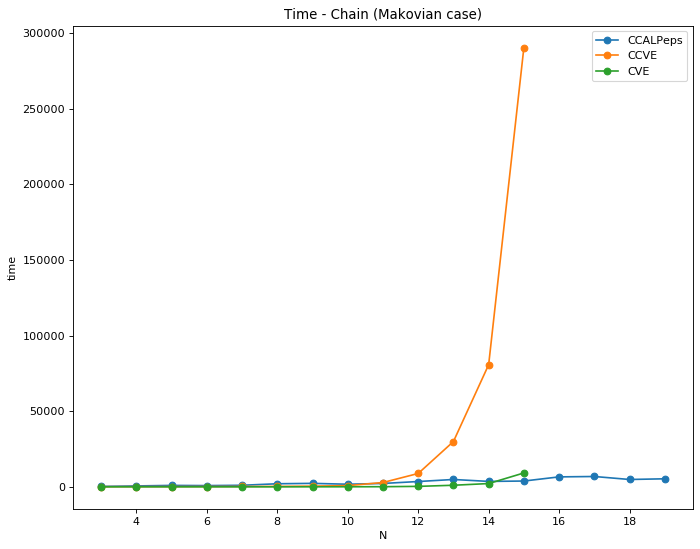

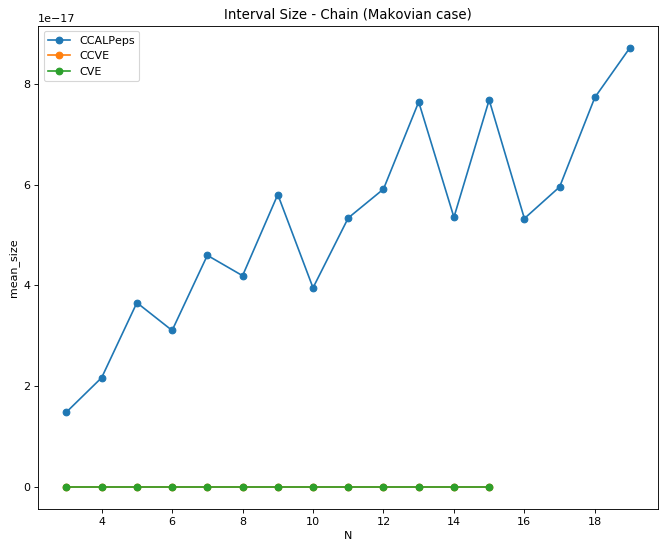

In [6]:
datafile = paths["markovian_ev"]
if datafile != None:
    results = pd.read_csv(datafile)
    plot_time(results, title="Time - Chain (Makovian case)")
    plot_size(results, title = "Interval Size - Chain (Makovian case)")

## Chain non-markovian case

query: $P(X_{N//2} | X_{N-1}, do(X_0))$

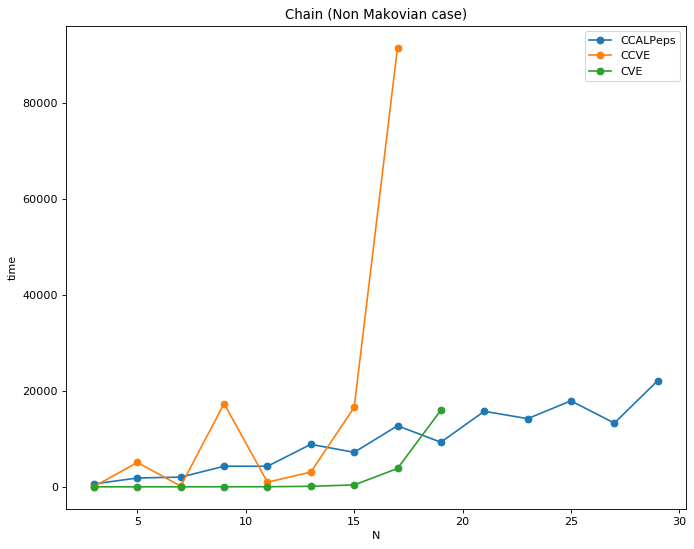

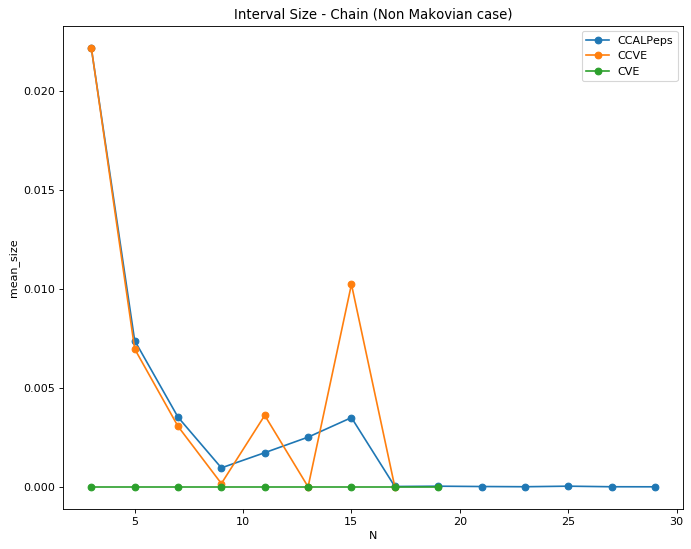

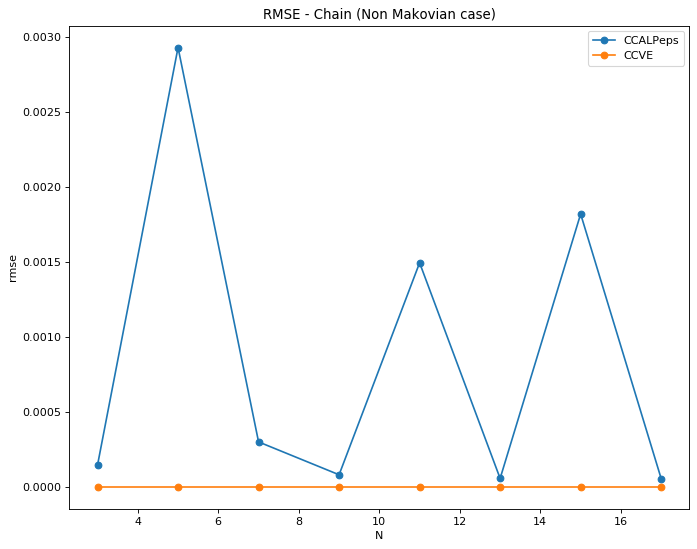

In [7]:
datafile = paths["nonmarkovian_ev"]
results = pd.read_csv(datafile)
plot_time(results, title = "Chain (Non Makovian case)")
plot_size(results, title = "Interval Size - Chain (Non Makovian case)")
plot_rmse(results, title = "RMSE - Chain (Non Makovian case)")


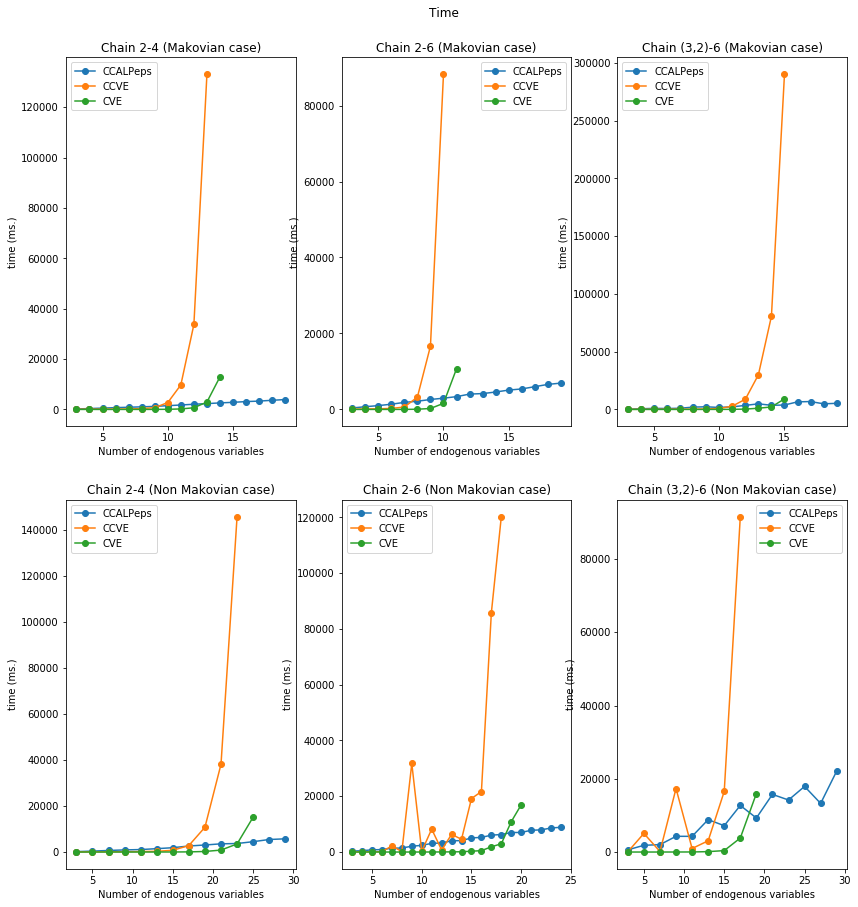

In [67]:
fig, axs = plt.subplots(2, len(list(res)), figsize=(14,14))

plot_func = plot_time
ylabel = "time (ms.)"
fig.suptitle("Time")
fig.subplots_adjust(top=0.93)
target = "target!=1"


for k,v in res.items():
    
    i = list(res).index(k)

    
    data = pd.read_csv(v["markovian_ev"])
    #if "target" in data: data = data.query(target)

    plot_func(pd.read_csv(v["markovian_ev"]), 
              ax=axs[0,i],
              title=f"{k} (Makovian case)",
              xlabel="Number of endogenous variables", ylabel=ylabel)
    
    
    data = pd.read_csv(v["nonmarkovian_ev"])
    #if "target" in data: data = data.query(target)
    
    plot_func(data, 
          ax=axs[1,i],
          title=f"{k} (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)

    




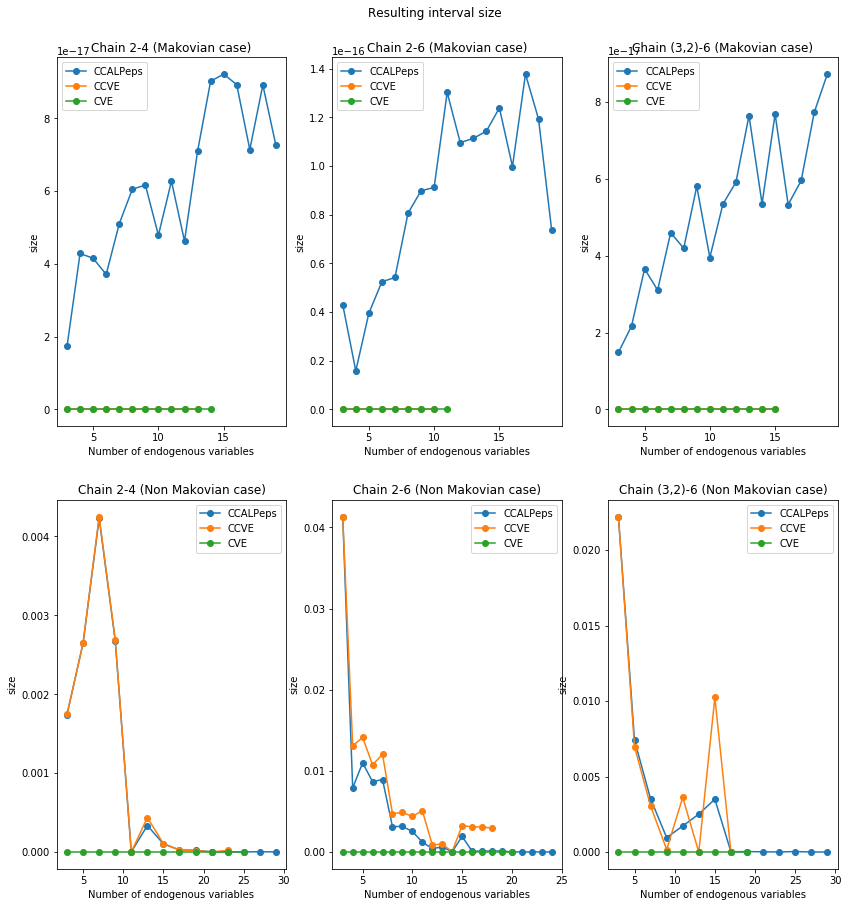

In [68]:
fig, axs = plt.subplots(2, len(list(res)), figsize=(14,14))

plot_func = plot_size
ylabel = "size"
fig.suptitle("Resulting interval size")
fig.subplots_adjust(top=0.93)
target = "target!=1"



for k,v in res.items():
    
    i = list(res).index(k)

    
    data = pd.read_csv(v["markovian_ev"])

    plot_func(pd.read_csv(v["markovian_ev"]), 
              ax=axs[0,i],
              title=f"{k} (Makovian case)",
              xlabel="Number of endogenous variables", ylabel=ylabel)
    
    
    data = pd.read_csv(v["nonmarkovian_ev"])
    
    plot_func(data, 
          ax=axs[1,i],
          title=f"{k} (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)



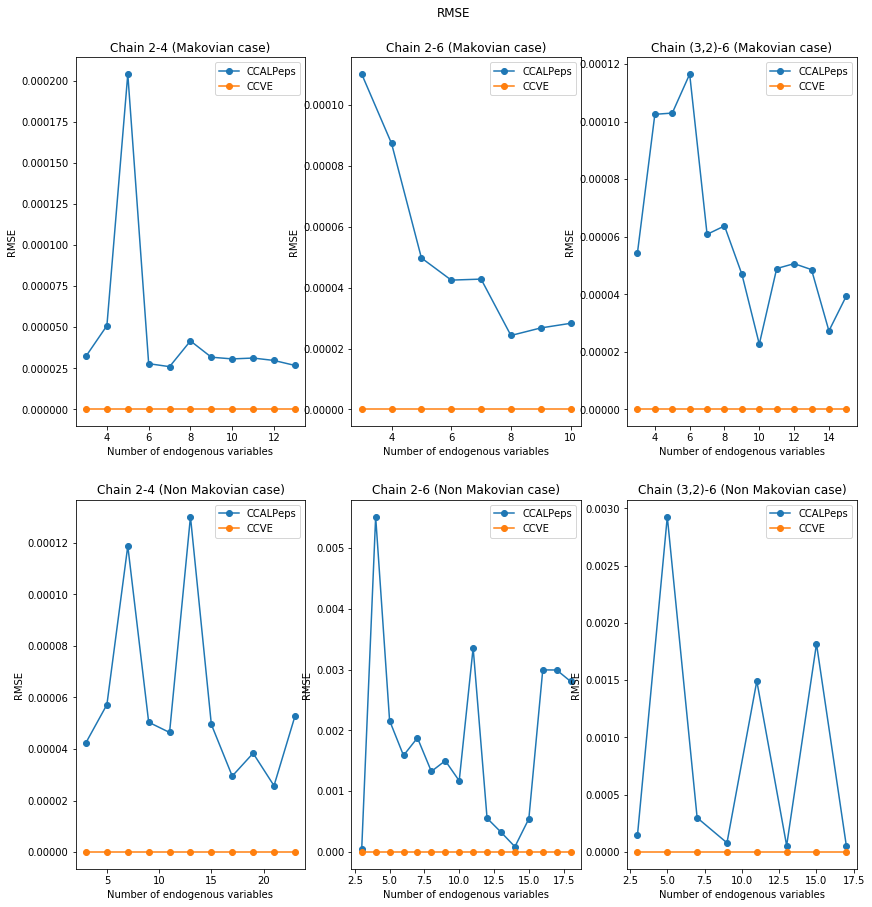

In [69]:
fig, axs = plt.subplots(2, len(list(res)), figsize=(14,14))

plot_func = plot_rmse
ylabel = "RMSE"
fig.suptitle("RMSE")
fig.subplots_adjust(top=0.93)

target = "target!=1"



for k,v in res.items():
    
    i = list(res).index(k)

    
    data = pd.read_csv(v["markovian_ev"])

    plot_func(pd.read_csv(v["markovian_ev"]), 
              ax=axs[0,i],
              title=f"{k} (Makovian case)",
              xlabel="Number of endogenous variables", ylabel=ylabel)
    
    
    data = pd.read_csv(v["nonmarkovian_ev"])
    
    plot_func(data, 
          ax=axs[1,i],
          title=f"{k} (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)

In [4]:
res_folder

NameError: name 'res_folder' is not defined

In [9]:
res_folder

'/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA/papers/pgm20/experiments//results/'

In [21]:
res_file = f"{res_folder}{strdate()}_chain_nonmarkovian_ev.csv"
pd.concat(
    [pd.read_csv(f"{res_folder}/2020-05-09-19-20-35_chain_nonmarkovian_ev.csv",index_col=0),
     pd.read_csv(f"{res_folder}/2020-05-10-11-25-15_chain_nonmarkovian_ev.csv",index_col=0)]).to_csv(res_file)


print(res_file)

/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA/papers/pgm20/experiments//results/2020-05-10-17-16-38_chain_nonmarkovian_ev.csv


In [30]:
[(list(res).index(k),k,v) for k,v in res.items()]

[(0,
  'Chain 2-4',
  {'markovian_ev': '/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA/papers/pgm20/experiments//results//2020-04-26-16-37-58_chain_markovian_ev.csv',
   'nonmarkovian_ev': '/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA/papers/pgm20/experiments//results//2020-04-27-22-28-04_chain_nonmarkovian_ev.csv'}),
 (1,
  'Chain 2-6',
  {'markovian_ev': '/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA/papers/pgm20/experiments//results//2020-05-09-00-45-58_chain_markovian_ev.csv',
   'nonmarkovian_ev': '/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA/papers/pgm20/experiments//results//2020-05-10-17-16-38_chain_nonmarkovian_ev.csv'}),
 (2,
  'Chain (3,2)-6',
  {'markovian_ev': '/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA/papers/pgm20/experiments//results//2020-05-04-16-23-18_chain_terbin_markovian_ev.csv',
   'nonmarkovian_ev': '/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA/papers/pgm20/experiments//resu

In [65]:
tag = "nonmarkovian_ev"
res_file = f"{res_folder}{strdate()}_chain_{tag}.csv"
pd.read_csv(binResExo6[tag], index_col=0).query("target!=1").drop(columns=["target"]).to_csv(res_file)
res_file

'/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA/papers/pgm20/experiments//results/2020-05-10-18-30-05_chain_nonmarkovian_ev.csv'

In [ ]:
2020-05-10-18-28-51_chain_markovian_ev.csv
2020-05-10-18-30-05_chain_nonmarkovian_ev